# Project 3 -- All 5 Categories

In [1]:
from os import path
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image
from shuffle import train_test_split

In [2]:
# Path helper function. 
path_to = lambda *p : path.join(os.getcwd(), *p)

## Download dataset form Roboflow
For this to work you must update with your own API key. This is only necessary if you want to train it yourself.

In [3]:

from roboflow import Roboflow
rf = Roboflow(api_key="hVv5yriLWmPXuMBvxJQV")
project = rf.workspace("pikavision").project("project2-dataset")
version = project.version(3)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to project2-dataset-3 in yolov11:: 100%|██████████| 19466/19466 [00:01<00:00, 19152.29it/s]


### Split the data
This splits the data into train, valid, and test datasets at random. 

85% train, 10% validation, 5% test

In [4]:
# Split data into train validation and dest datasets
train_test_split(path_to('project2-dataset-3', 'train'), percentage_test=5, percentage_valid=10)

Total images in src directory: 9730
samoyed_169_jpg.rf.59ceb578dd4d2a9e06bf0fb236a15913
staffordshire_bull_terrier_120_jpg.rf.2e4cc3a0b0d64909345eedb689cc4c64
tello_387_jpeg_jpg.rf.cb5c2c093aa46f1b6275b7ba99d33a7d
english_cocker_spaniel_132_jpg.rf.eb890eaaa123789c7f53a51b40703cac
image-689-_jpg.rf.36023ca813c862b9e8e48ff0b29c9cf3
tello_15_jpeg_jpg.rf.1cde331bbc0e5f8fe5303f5e3e56ff2f
image-17-_jpg.rf.2c359617b2d6df9125f509c193bcaf2a
foto01306_jpg.rf.5204eebfd6f341475971251d3907a671
english_setter_164_jpg.rf.a282524751eea1eb70884ae847b8dcae
Ragdoll_127_jpg.rf.367f10419547b2c55ae8c16e873a81e7
pic_131_jpg.rf.66ee7fe1a4783b89679e9c82eb2e6e9a
pic_967_jpg.rf.ff4252127edfe46d8db00984c038a9a8
keeshond_178_jpg.rf.1277053c76804843851b5f993858f76f
image-20-_jpg.rf.4004b894732a96b2ec28b712caaac9b2
Bengal_190_jpg.rf.2ac494f150991db711e738f1a012cefa
staffordshire_bull_terrier_106_jpg.rf.affe4d9e99d846122b7a5324b31d7411
pic_815_jpg.rf.c809326058b622da748e0dd243073474
yoto02901_jpg.rf.c03a537f3580adea3

## Test Model Function

Takes the model and a sample image and saves new photo with prediction(s) and bounding boxes.

In [3]:
def test_model(model : YOLO, sample_image : str):
    path_to_img = path_to('test_images', sample_image)
    results = model.predict(
        source=path_to_img,
        conf=0.25,
    )

    for r in results:
        name = 'the_detected_' + sample_image
        path_to_predicted_img = path_to('test_images', name)
        r.save(path_to_predicted_img)
    image = Image.open(path_to_predicted_img)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
        

## Train the model 
Takes model and new data. Uses "Transfer Learning" to add/improve category(s) based on new data given. 

In [4]:
def train_model(model : YOLO, yaml_file : str) -> YOLO:
    results = model.train(
        data = path_to('project2-dataset-3', yaml_file),
        epochs = 100,
        imgsz = 640,
        save_dir = path_to(),
        device = 'gpu',
        batch=16
        
    )
    

### Load pretrained model
This loads the YOLOv11 model as a starting point

In [5]:
model = YOLO('yolo11n.pt')


image 1/1 /home/hunt3041/PikaVision/test_images/the_cat.png: 384x640 1 cat, 43.8ms
Speed: 4.3ms preprocess, 43.8ms inference, 201.3ms postprocess per image at shape (1, 3, 384, 640)


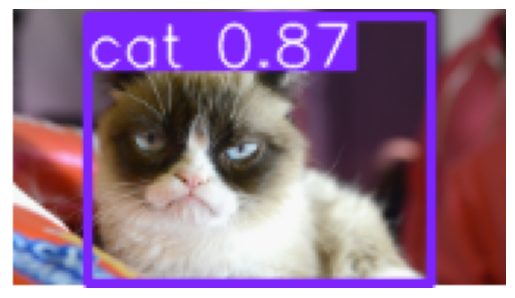


image 1/1 /home/hunt3041/PikaVision/test_images/the_dog.png: 416x640 1 dog, 42.1ms
Speed: 1.0ms preprocess, 42.1ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


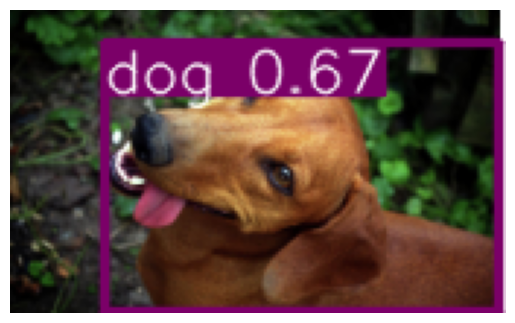


image 1/1 /home/hunt3041/PikaVision/test_images/the_drone.jpg: 384x640 1 airplane, 5.4ms
Speed: 1.0ms preprocess, 5.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


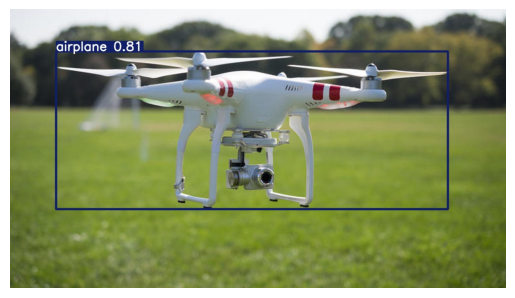


image 1/1 /home/hunt3041/PikaVision/test_images/the_person.png: 448x640 2 persons, 35.8ms
Speed: 1.0ms preprocess, 35.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


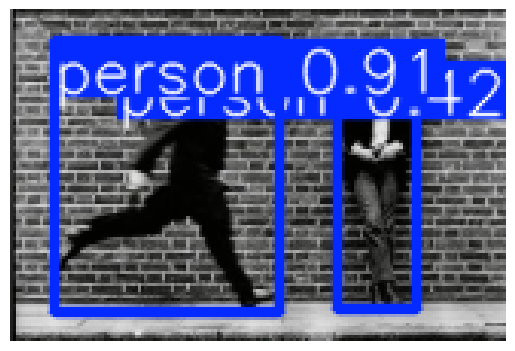


image 1/1 /home/hunt3041/PikaVision/test_images/the_pikachu.jpeg: 320x640 1 teddy bear, 39.5ms
Speed: 0.8ms preprocess, 39.5ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


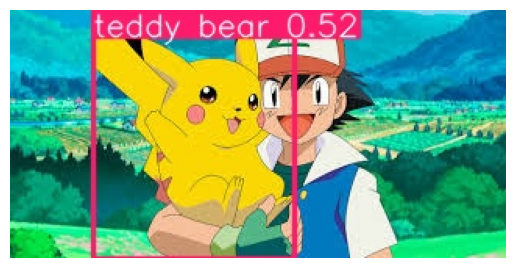

In [6]:
# Test the pretrained model
test_model(model, 'the_cat.png')
test_model(model, 'the_dog.png')
test_model(model, 'the_drone.jpg')
test_model(model, 'the_person.png')
test_model(model, 'the_pikachu.jpeg') 

In [9]:
train_model(model, 'data.yaml')

Ultralytics 8.3.34 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:gpu (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/hunt3041/PikaVision/project2-dataset-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /home/hunt3041/PikaVision/project2-dataset-3/train/labels... 8270 images, 1004 backgrounds, 0 corrupt: 100%|██████████| 8270/8270 [00:05<00:00, 1384.95it/s]

train: New cache created: /home/hunt3041/PikaVision/project2-dataset-3/train/labels.cache



val: Scanning /home/hunt3041/PikaVision/project2-dataset-3/valid/labels... 973 images, 133 backgrounds, 0 corrupt: 100%|██████████| 973/973 [00:00<00:00, 1055.89it/s]


val: New cache created: /home/hunt3041/PikaVision/project2-dataset-3/valid/labels.cache
Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.38G      2.435      3.898      2.517         31        640: 100%|██████████| 517/517 [01:13<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.61it/s]


                   all        973       1019      0.389      0.452      0.317      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.38G       1.62      2.548      1.892         20        640: 100%|██████████| 517/517 [01:05<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.22it/s]

                   all        973       1019      0.633      0.637      0.667      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.37G      1.415      1.974      1.696         32        640: 100%|██████████| 517/517 [01:07<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.76it/s]

                   all        973       1019      0.716      0.687      0.729      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.35G      1.344      1.736      1.628         34        640: 100%|██████████| 517/517 [01:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.71it/s]

                   all        973       1019       0.75      0.741      0.786      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.37G      1.284      1.572      1.565         31        640: 100%|██████████| 517/517 [01:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.97it/s]

                   all        973       1019      0.798      0.742      0.813      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.37G      1.218      1.471      1.515         30        640: 100%|██████████| 517/517 [01:09<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.55it/s]

                   all        973       1019      0.819      0.792      0.856      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.39G      1.191      1.382      1.495         32        640: 100%|██████████| 517/517 [01:13<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  6.15it/s]

                   all        973       1019      0.861      0.759      0.851      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.39G      1.158      1.328      1.471         35        640: 100%|██████████| 517/517 [01:10<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.23it/s]

                   all        973       1019      0.877      0.805      0.873      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.37G      1.131      1.256      1.447         42        640: 100%|██████████| 517/517 [01:10<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.80it/s]

                   all        973       1019      0.865      0.818      0.874      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.39G       1.12      1.234      1.438         28        640: 100%|██████████| 517/517 [01:11<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.86it/s]

                   all        973       1019      0.841      0.835      0.876      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.39G      1.099      1.192      1.417         34        640: 100%|██████████| 517/517 [01:11<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.72it/s]

                   all        973       1019      0.899      0.805       0.89      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.35G      1.081      1.167      1.404         33        640: 100%|██████████| 517/517 [01:12<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.49it/s]

                   all        973       1019      0.906      0.818      0.894      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.4G      1.075      1.144      1.403         26        640: 100%|██████████| 517/517 [01:10<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.21it/s]

                   all        973       1019      0.839      0.836       0.88      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.37G      1.064      1.126      1.387         26        640: 100%|██████████| 517/517 [01:13<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.62it/s]

                   all        973       1019      0.881      0.853        0.9      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.37G      1.046      1.105      1.378         27        640: 100%|██████████| 517/517 [01:10<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.97it/s]

                   all        973       1019      0.903      0.834      0.905      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.37G      1.043      1.084      1.373         26        640: 100%|██████████| 517/517 [01:10<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.45it/s]

                   all        973       1019      0.902      0.847      0.914      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.37G      1.031      1.052      1.364         41        640: 100%|██████████| 517/517 [01:04<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.17it/s]

                   all        973       1019      0.888       0.86      0.911      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.35G      1.026      1.058      1.366         40        640: 100%|██████████| 517/517 [01:04<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.60it/s]

                   all        973       1019      0.906      0.866      0.922      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.39G      1.015      1.024       1.35         22        640: 100%|██████████| 517/517 [01:04<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.64it/s]

                   all        973       1019      0.929      0.848      0.915       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.39G       1.01      1.015      1.342         28        640: 100%|██████████| 517/517 [01:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.10it/s]

                   all        973       1019      0.888      0.878      0.923      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.37G      0.995          1      1.333         29        640: 100%|██████████| 517/517 [01:04<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.18it/s]

                   all        973       1019      0.905      0.869      0.918      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.37G     0.9974      1.002      1.335         26        640: 100%|██████████| 517/517 [01:04<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.18it/s]

                   all        973       1019      0.899      0.878      0.926        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.35G     0.9782     0.9848      1.326         24        640: 100%|██████████| 517/517 [01:04<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.20it/s]

                   all        973       1019      0.897      0.878      0.924      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.35G     0.9827     0.9712      1.325         28        640: 100%|██████████| 517/517 [01:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]

                   all        973       1019      0.903      0.881      0.928      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.41G     0.9742     0.9538      1.319         32        640: 100%|██████████| 517/517 [01:06<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.12it/s]

                   all        973       1019      0.907      0.876      0.933      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.37G     0.9723     0.9495      1.318         24        640: 100%|██████████| 517/517 [01:04<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.10it/s]

                   all        973       1019      0.924      0.882      0.933       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.39G      0.951     0.9168      1.302         29        640: 100%|██████████| 517/517 [01:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.21it/s]

                   all        973       1019      0.921      0.888      0.929      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.39G     0.9589     0.9269        1.3         40        640: 100%|██████████| 517/517 [01:04<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.29it/s]


                   all        973       1019      0.901      0.882      0.933      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.37G     0.9475     0.9184      1.302         29        640: 100%|██████████| 517/517 [01:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.11it/s]

                   all        973       1019      0.919      0.883      0.934      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.35G     0.9406     0.8978      1.295         30        640: 100%|██████████| 517/517 [01:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.36it/s]

                   all        973       1019      0.907      0.888      0.932      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.35G     0.9392     0.9022      1.295         39        640: 100%|██████████| 517/517 [01:04<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.06it/s]

                   all        973       1019      0.932      0.885      0.936      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.35G     0.9342      0.894      1.288         23        640: 100%|██████████| 517/517 [01:07<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.24it/s]

                   all        973       1019      0.913      0.882      0.934      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.37G     0.9347     0.8856      1.286         24        640: 100%|██████████| 517/517 [01:04<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.25it/s]


                   all        973       1019      0.922       0.89      0.936      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.35G     0.9293     0.8842      1.287         34        640: 100%|██████████| 517/517 [01:07<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.66it/s]

                   all        973       1019      0.917      0.891      0.932      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.35G     0.9129     0.8672      1.272         27        640: 100%|██████████| 517/517 [01:04<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.14it/s]

                   all        973       1019      0.924      0.899      0.939      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G     0.9106     0.8534      1.273         37        640: 100%|██████████| 517/517 [01:04<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.53it/s]

                   all        973       1019      0.942      0.896      0.945      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.37G     0.9133     0.8462      1.269         34        640: 100%|██████████| 517/517 [01:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.35it/s]


                   all        973       1019      0.925      0.907      0.943      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.35G      0.914     0.8459      1.271         28        640: 100%|██████████| 517/517 [01:03<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.16it/s]


                   all        973       1019       0.94      0.898      0.945      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.37G     0.8956     0.8263       1.26         28        640: 100%|██████████| 517/517 [01:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]


                   all        973       1019      0.905      0.912      0.943      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.35G     0.9023     0.8397      1.264         24        640: 100%|██████████| 517/517 [01:04<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.29it/s]

                   all        973       1019      0.935      0.894      0.945      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.37G     0.8922     0.8204      1.255         38        640: 100%|██████████| 517/517 [01:04<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.49it/s]

                   all        973       1019      0.939      0.907      0.951      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.37G     0.8873     0.8186       1.25         33        640: 100%|██████████| 517/517 [01:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.57it/s]


                   all        973       1019      0.943      0.899      0.946      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.35G     0.8771      0.806      1.249         28        640: 100%|██████████| 517/517 [01:04<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]

                   all        973       1019      0.921      0.907      0.947      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.35G     0.8781     0.7966      1.243         32        640: 100%|██████████| 517/517 [01:04<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.86it/s]

                   all        973       1019      0.923      0.905      0.945      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.39G     0.8757     0.8024      1.249         25        640: 100%|██████████| 517/517 [01:04<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]

                   all        973       1019      0.933      0.902       0.95       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.35G     0.8659     0.7772       1.24         38        640: 100%|██████████| 517/517 [01:04<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.41it/s]


                   all        973       1019      0.945      0.894      0.951      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.37G     0.8585     0.7736      1.237         19        640: 100%|██████████| 517/517 [01:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.19it/s]


                   all        973       1019      0.939      0.907      0.952      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.37G     0.8678     0.7846      1.241         28        640: 100%|██████████| 517/517 [01:10<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.45it/s]

                   all        973       1019      0.945      0.908      0.952      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.39G     0.8523     0.7609      1.228         36        640: 100%|██████████| 517/517 [01:09<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.45it/s]

                   all        973       1019      0.933      0.915      0.952      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.39G      0.853     0.7631      1.232         41        640: 100%|██████████| 517/517 [01:09<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.80it/s]

                   all        973       1019      0.936      0.911       0.95      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.37G     0.8474     0.7581      1.226         26        640: 100%|██████████| 517/517 [01:12<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.44it/s]

                   all        973       1019      0.941      0.922      0.954      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.35G     0.8421     0.7551       1.23         20        640: 100%|██████████| 517/517 [01:07<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.79it/s]

                   all        973       1019      0.936      0.923      0.957      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.37G     0.8455     0.7542      1.228         31        640: 100%|██████████| 517/517 [01:07<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.38it/s]

                   all        973       1019       0.94      0.912      0.953      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.39G     0.8425     0.7557      1.224         31        640: 100%|██████████| 517/517 [01:09<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  6.19it/s]

                   all        973       1019       0.95      0.912      0.958      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.39G     0.8369     0.7431      1.215         43        640: 100%|██████████| 517/517 [01:10<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  6.03it/s]

                   all        973       1019      0.949      0.925      0.955      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.35G     0.8357     0.7418      1.217         30        640: 100%|██████████| 517/517 [01:09<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.43it/s]


                   all        973       1019      0.927       0.93      0.955      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G     0.8347     0.7354      1.219         31        640: 100%|██████████| 517/517 [01:11<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.64it/s]

                   all        973       1019       0.95      0.923      0.959      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.37G     0.8246     0.7228      1.211         38        640: 100%|██████████| 517/517 [01:07<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.72it/s]

                   all        973       1019      0.945      0.915      0.958      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.35G     0.8261     0.7191       1.21         34        640: 100%|██████████| 517/517 [01:07<00:00,  7.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.71it/s]

                   all        973       1019      0.948      0.925      0.957      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.39G     0.8229     0.7116      1.209         26        640: 100%|██████████| 517/517 [01:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.74it/s]

                   all        973       1019      0.949      0.922      0.956      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G     0.8116      0.706      1.203         32        640: 100%|██████████| 517/517 [01:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.01it/s]

                   all        973       1019      0.958      0.917      0.956      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.39G     0.8141     0.7056      1.202         30        640: 100%|██████████| 517/517 [01:04<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.23it/s]

                   all        973       1019      0.943       0.92      0.957      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.37G     0.8093     0.6898      1.198         39        640: 100%|██████████| 517/517 [01:03<00:00,  8.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.43it/s]


                   all        973       1019      0.933       0.92      0.956      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.35G     0.7978     0.6863      1.194         26        640: 100%|██████████| 517/517 [01:04<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.46it/s]


                   all        973       1019      0.948       0.92      0.959      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.37G     0.8053     0.6791      1.192         35        640: 100%|██████████| 517/517 [01:08<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.63it/s]

                   all        973       1019       0.95      0.921      0.959       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.37G     0.7982      0.684      1.191         49        640: 100%|██████████| 517/517 [01:05<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.12it/s]

                   all        973       1019      0.941      0.923      0.958       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.37G     0.8091     0.6822      1.196         31        640: 100%|██████████| 517/517 [01:04<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.38it/s]

                   all        973       1019      0.951      0.918      0.961      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.35G     0.8003     0.6878      1.193         52        640: 100%|██████████| 517/517 [01:04<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.15it/s]

                   all        973       1019      0.944      0.923      0.962      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G     0.7893     0.6714      1.188         35        640: 100%|██████████| 517/517 [01:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.22it/s]


                   all        973       1019      0.949      0.921      0.958      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.35G      0.785     0.6716      1.183         29        640: 100%|██████████| 517/517 [01:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.31it/s]

                   all        973       1019      0.955      0.909      0.959      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.35G     0.7782     0.6557      1.179         29        640: 100%|██████████| 517/517 [01:03<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.27it/s]

                   all        973       1019      0.954      0.913       0.96      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.39G     0.7839     0.6519      1.182         26        640: 100%|██████████| 517/517 [01:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.39it/s]

                   all        973       1019      0.959      0.912      0.962      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.37G     0.7702     0.6453      1.173         37        640: 100%|██████████| 517/517 [01:03<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.73it/s]

                   all        973       1019      0.954      0.923      0.962      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.35G     0.7679     0.6419      1.174         30        640: 100%|██████████| 517/517 [01:05<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.52it/s]

                   all        973       1019      0.943      0.931      0.963      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.39G     0.7697     0.6405      1.175         25        640: 100%|██████████| 517/517 [01:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.12it/s]

                   all        973       1019      0.955      0.923      0.964      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.35G     0.7687     0.6346      1.172         45        640: 100%|██████████| 517/517 [01:04<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.54it/s]

                   all        973       1019      0.959      0.918      0.964      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.36G     0.7674     0.6346      1.167         27        640: 100%|██████████| 517/517 [01:04<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.54it/s]

                   all        973       1019      0.951      0.933      0.965      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.39G     0.7577     0.6345       1.17         31        640: 100%|██████████| 517/517 [01:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.63it/s]

                   all        973       1019      0.956      0.925      0.963      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.37G     0.7543     0.6258       1.16         32        640: 100%|██████████| 517/517 [01:03<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.65it/s]

                   all        973       1019      0.954      0.934      0.964        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.39G     0.7452     0.6143      1.158         28        640: 100%|██████████| 517/517 [01:04<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  6.14it/s]

                   all        973       1019       0.95      0.932      0.964      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.37G     0.7439     0.6121      1.156         27        640: 100%|██████████| 517/517 [01:06<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.30it/s]

                   all        973       1019      0.954      0.923      0.964      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.37G     0.7522     0.6109      1.158         45        640: 100%|██████████| 517/517 [01:06<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.18it/s]

                   all        973       1019      0.952      0.926      0.965      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.35G     0.7424     0.6108      1.153         34        640: 100%|██████████| 517/517 [01:04<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.00it/s]

                   all        973       1019      0.953      0.923      0.965      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.35G     0.7376        0.6       1.15         37        640: 100%|██████████| 517/517 [01:03<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.63it/s]

                   all        973       1019      0.936      0.941      0.965      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.37G     0.7383     0.6022      1.151         22        640: 100%|██████████| 517/517 [01:04<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.33it/s]

                   all        973       1019       0.96      0.915      0.965      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.4G     0.7242     0.5966      1.148         31        640: 100%|██████████| 517/517 [01:05<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  6.15it/s]

                   all        973       1019      0.939      0.936      0.966      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.37G     0.7252     0.5789      1.145         29        640: 100%|██████████| 517/517 [01:05<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.60it/s]

                   all        973       1019      0.937      0.939      0.966      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.35G     0.7252     0.5885      1.147         32        640: 100%|██████████| 517/517 [01:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.13it/s]


                   all        973       1019      0.945      0.937      0.967      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.36G     0.7145     0.5814      1.137         32        640: 100%|██████████| 517/517 [01:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.23it/s]

                   all        973       1019      0.948      0.934      0.967      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.37G     0.7131      0.581      1.141         30        640: 100%|██████████| 517/517 [01:03<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.95it/s]

                   all        973       1019      0.951      0.931      0.967      0.807


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.35G     0.6078     0.3968      1.088         22        640: 100%|██████████| 517/517 [01:03<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.27it/s]

                   all        973       1019      0.948      0.938      0.968      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.35G     0.5943      0.374      1.072         10        640: 100%|██████████| 517/517 [01:03<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.20it/s]

                   all        973       1019      0.953      0.935      0.968      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.39G     0.5844      0.372      1.071         13        640: 100%|██████████| 517/517 [01:03<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.59it/s]

                   all        973       1019      0.948      0.938      0.968      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.35G      0.583     0.3713      1.069         14        640: 100%|██████████| 517/517 [01:03<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.74it/s]

                   all        973       1019      0.948      0.938      0.968      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.35G     0.5711     0.3602      1.061         16        640: 100%|██████████| 517/517 [01:04<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.51it/s]

                   all        973       1019      0.955      0.929      0.968      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.37G     0.5691     0.3496      1.054         20        640: 100%|██████████| 517/517 [01:05<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.32it/s]

                   all        973       1019      0.934      0.945      0.968       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.37G     0.5616     0.3495      1.052         14        640: 100%|██████████| 517/517 [01:04<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.30it/s]

                   all        973       1019       0.94      0.944      0.968       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.35G     0.5595     0.3456      1.049         13        640: 100%|██████████| 517/517 [01:03<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.08it/s]

                   all        973       1019      0.939      0.947      0.968      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.35G     0.5537     0.3421      1.048         13        640: 100%|██████████| 517/517 [01:02<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  7.08it/s]

                   all        973       1019      0.937      0.948      0.967       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.35G     0.5515     0.3409      1.045         15        640: 100%|██████████| 517/517 [01:03<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:04<00:00,  6.98it/s]

                   all        973       1019      0.936      0.948      0.968       0.81



100 epochs completed in 1.964 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:gpu (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.33it/s]


                   all        973       1019      0.937      0.948      0.968      0.811
                   cat        117        117      0.967      0.995      0.995      0.923
                   dog        241        241      0.967      0.979      0.993      0.867
                 drone        232        244      0.965      0.963       0.99      0.702
                person        194        361      0.824      0.823      0.877      0.699
               pikachu         56         56      0.965      0.978      0.986      0.866
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train6


In [13]:
# Load custom model
new_model = YOLO(path_to('runs', 'detect', '5_categories_no_aug', 'weights', 'best.pt'))


image 1/1 /home/hunt3041/PikaVision/test_images/the_cat.png: 384x640 1 cat, 17.9ms
Speed: 1.9ms preprocess, 17.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


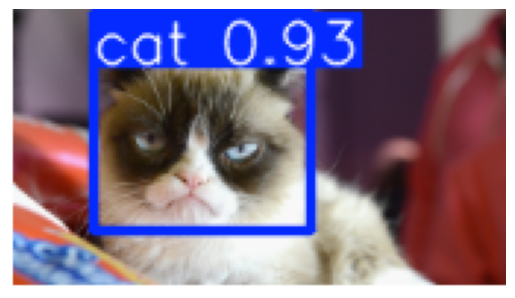


image 1/1 /home/hunt3041/PikaVision/test_images/the_dog.png: 416x640 1 dog, 14.2ms
Speed: 2.0ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


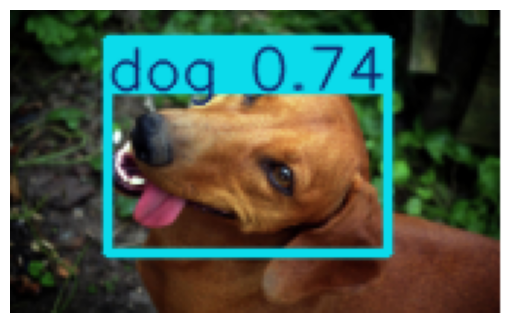


image 1/1 /home/hunt3041/PikaVision/test_images/the_drone.jpg: 384x640 1 drone, 13.7ms
Speed: 2.4ms preprocess, 13.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


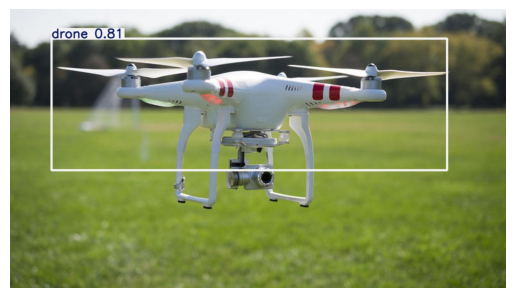


image 1/1 /home/hunt3041/PikaVision/test_images/the_person.png: 448x640 3 persons, 20.1ms
Speed: 1.8ms preprocess, 20.1ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


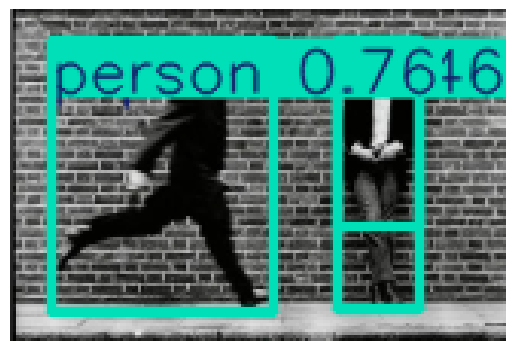


image 1/1 /home/hunt3041/PikaVision/test_images/the_pikachu.jpeg: 320x640 1 pikachu, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 640)


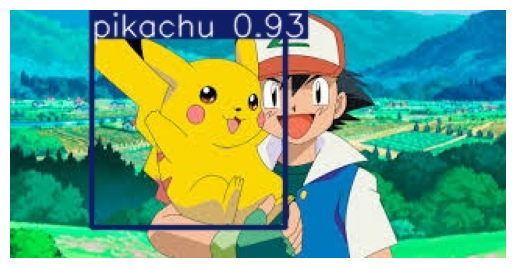


image 1/1 /home/hunt3041/PikaVision/test_images/dog2.jpg: 640x480 1 dog, 22.4ms
Speed: 2.0ms preprocess, 22.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)


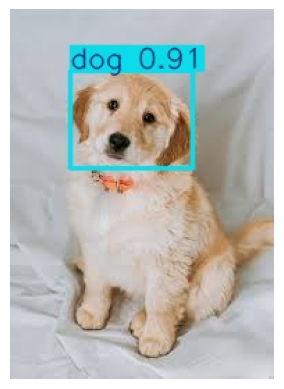


image 1/1 /home/hunt3041/PikaVision/test_images/person2.jpg: 384x640 1 person, 15.2ms
Speed: 3.7ms preprocess, 15.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


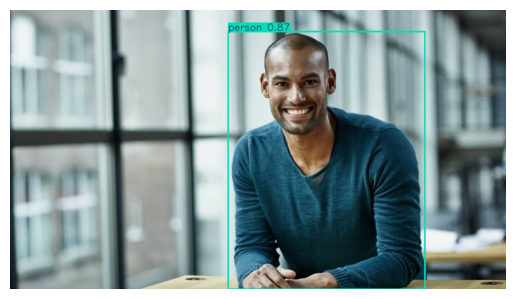

In [14]:
# test custom model
test_model(new_model, 'the_cat.png')
test_model(new_model, 'the_dog.png')
test_model(new_model, 'the_drone.jpg')
test_model(new_model, 'the_person.png')
test_model(new_model, 'the_pikachu.jpeg')
test_model(new_model, 'dog2.jpg')
test_model(new_model, 'person2.jpg')

In [15]:
results = new_model.val(data=path_to('project2-dataset-3', 'data.yaml'))

Ultralytics 8.3.34 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)


val: Scanning /home/hunt3041/PikaVision/project2-dataset-3/valid/labels.cache... 973 images, 133 backgrounds, 0 corrupt: 100%|██████████| 973/973 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▍         | 3/61 [00:07<02:29,  2.58s/it]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:18<00:00,  3.27it/s]


                   all        973       1019       0.94      0.942      0.964      0.808
                   cat        117        117      0.967      0.994      0.995      0.921
                   dog        241        241      0.967      0.966      0.987      0.858
                 drone        232        244      0.968      0.951      0.974      0.692
                person        194        361      0.834      0.822      0.877        0.7
               pikachu         56         56      0.965      0.977      0.986      0.866
Speed: 0.5ms preprocess, 3.4ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/val
